In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import terra
import meerkat as mk
from domino.plot import generate_group_df
import numpy as np
import pandas as pd
from rich import print

import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1,'/pd/maya/domino/domino')

/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


### Plots: Section 5.2 - Embeddings

In [3]:
# df_synthetic_corr = generate_group_df(40598, 45159, "correlation")
# df_synthetic_rare = generate_group_df(57203, 58676, "rare")
# df_synthetic_nl = generate_group_df(63176, 64524, "noisy_label")

# df = pd.concat([df_synthetic_corr, df_synthetic_rare, df_synthetic_nl])
# df.head()
df_synthetic_rare = generate_group_df(
    score_sdms_id=77006, slice_type="rare", spec_columns=[]
)
df_synthetic_noisy = generate_group_df(
    score_sdms_id=77006, slice_type="noisy_label", spec_columns=[]
)


df = pd.concat([df_synthetic_rare, df_synthetic_noisy])  # , df_synthetic_rare, df_synthetic_nl])
df.head()


/home/sabri/code/domino/domino/plot.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)
/home/sabri/code/domino/domino/plot.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["success"] = coherence_metric(grouped_df)
/home/sabri/code/domino/domino/plot.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,...,run_sdm_run_id,score_model_run_id,emb_group,alpha,sdm_class,slice_name,index,emb_type,success,slice_type
7612,2,0,0.890639,0.2,0.16,0.09,0.222222,0.333333,0.37037,0.592593,...,72138,71078,bit,0.01,domino.sdm.confusion.ConfusionSDM,accessory.n.01,7612,bit,False,rare
7632,2,0,0.890639,0.2,0.16,0.09,0.222222,0.333333,0.37037,0.592593,...,72106,71078,clip,0.01,domino.sdm.confusion.ConfusionSDM,accessory.n.01,7632,clip,False,rare
7592,2,0,0.890639,0.2,0.16,0.09,0.222222,0.333333,0.37037,0.592593,...,72129,71078,random,0.01,domino.sdm.confusion.ConfusionSDM,accessory.n.01,7592,random,False,rare
41360,0,0,0.284797,0.0,0.00,0.00,0.000000,0.000000,0.00000,0.076923,...,75795,71177,bit,0.10,domino.sdm.confusion.ConfusionSDM,accessory.n.01,41360,bit,False,rare
41380,0,0,0.284797,0.0,0.00,0.00,0.000000,0.000000,0.00000,0.076923,...,75796,71177,clip,0.10,domino.sdm.confusion.ConfusionSDM,accessory.n.01,41380,clip,False,rare


<Figure size 432x288 with 0 Axes>

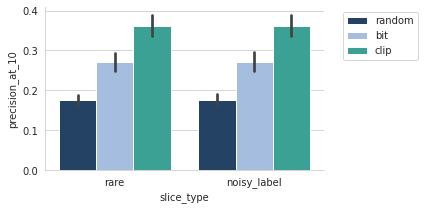

In [4]:
from transformers import pipeline, set_seed
from domino.plot import *
# df[]
# plot_df = []
# for slice_type in ["rare", "correlation", "noisy_label"]:
#     curr_df = df.copy()
#     curr_df["slice_type"] = slice_type
#     plot_df.append(curr_df)
# plot_df = pd.concat(plot_df)
plot_df = df
sns.set_style("whitegrid")
plt.tight_layout()
plt.figure(figsize=(5, 3))

plot_df = plot_df[plot_df["sdm_class"] == "domino.sdm.gmm.MixtureModelSDM"]
emb_groups = plot_df["emb_group"].unique()
pallette = {
    group: color
    for group, color in EMB_PALETTE.items()
    if group in emb_groups
}

sns.barplot(
    data=plot_df,
    y="precision_at_10",
    x="slice_type",
    hue="emb_group",
    hue_order=pallette.keys(),
    palette=sns.color_palette(pallette.values(), 3),
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.savefig("figures/08-01_bar.pdf")


In [39]:
plot_df["slice_type"]

7550            rare
7571            rare
7533            rare
41300           rare
41321           rare
            ...     
1135     noisy_label
1095     noisy_label
34865    noisy_label
34885    noisy_label
34845    noisy_label
Name: slice_type, Length: 4320, dtype: object